# Data Analysis Game Strategy

In [256]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [257]:
df = pd.read_csv('C:/Users/mot99/Dokumente/GitHub/game_2048/data/statistical.csv')
df.head()

,Strategy,Score,Number of moves,Highest Tile,Game over,Iteration,Board
0,Deep Q-Learning,2,1,2,False,0,"[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [2,..."
1,Deep Q-Learning,4,2,4,False,0,"[[4, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,..."
2,Deep Q-Learning,6,3,4,False,0,"[[0, 0, 4, 2], [0, 0, 0, 0], [0, 0, 0, 0], [0,..."
3,Deep Q-Learning,8,4,4,False,0,"[[0, 0, 4, 2], [0, 0, 0, 2], [0, 0, 0, 0], [0,..."
4,Deep Q-Learning,10,5,4,False,0,"[[0, 0, 4, 2], [0, 0, 0, 2], [0, 0, 0, 0], [0,..."


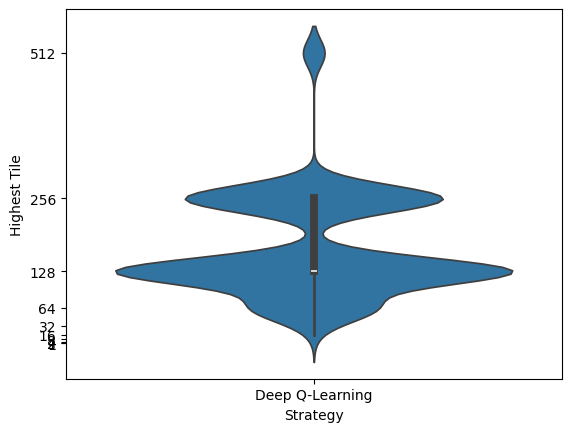

In [258]:
sns.violinplot(x='Strategy', y='Highest Tile', data=df[df['Game over'] == True])
plt.yticks(np.logspace(0, np.log2(df['Highest Tile'].max()), base=2, num=int(np.log2(df['Highest Tile'].max())) + 1))
plt.savefig('img/game_strategy.png')
plt.show()

In [259]:
max(df['Number of moves'])

406

## QLearning

In [260]:
df_q = df[df['Strategy']=='Deep Q-Learning']
df_q = df_q[df_q['Game over']]
df_q

,Strategy,Score,Number of moves,Highest Tile,Game over,Iteration,Board
293,Deep Q-Learning,628,293,256,True,0,"[[2, 8, 16, 2], [8, 256, 32, 4], [16, 128, 64,..."
294,Deep Q-Learning,328,145,128,True,100,"[[2, 4, 32, 2], [16, 2, 8, 4], [64, 128, 32, 8..."
295,Deep Q-Learning,370,164,128,True,200,"[[8, 2, 4, 8], [4, 16, 8, 64], [2, 32, 64, 8],..."
296,Deep Q-Learning,310,140,128,True,300,"[[2, 4, 8, 2], [128, 2, 16, 32], [8, 16, 64, 4..."
297,Deep Q-Learning,266,118,128,True,400,"[[2, 8, 4, 2], [4, 32, 16, 4], [2, 16, 128, 16..."
...,...,...,...,...,...,...,...
15019,Deep Q-Learning,212,95,64,True,80900,"[[16, 32, 4, 2], [2, 16, 8, 4], [8, 32, 64, 8]..."
15175,Deep Q-Learning,352,155,128,True,81000,"[[2, 8, 4, 2], [4, 64, 128, 8], [2, 32, 4, 64]..."
15176,Deep Q-Learning,240,107,64,True,81100,"[[4, 2, 4, 2], [8, 32, 64, 32], [4, 2, 32, 8],..."
15177,Deep Q-Learning,218,98,64,True,81200,"[[2, 4, 32, 4], [8, 16, 4, 16], [4, 8, 64, 4],..."


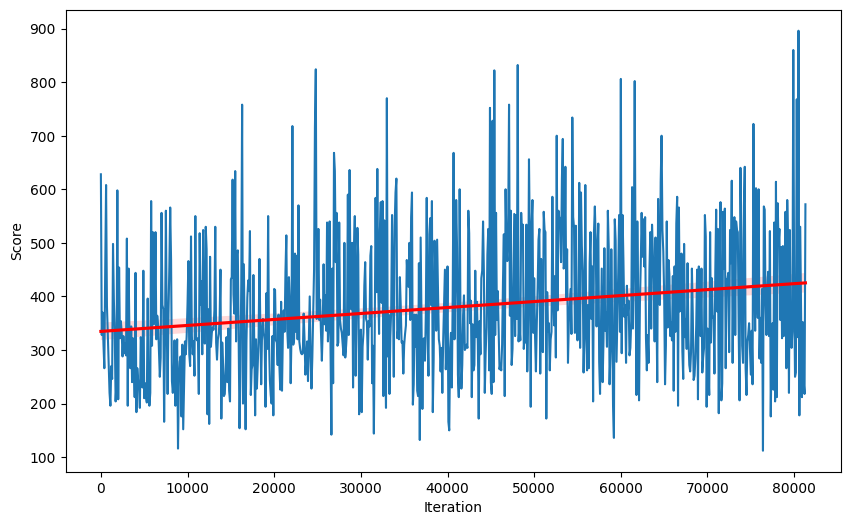

In [261]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Iteration', y='Score', data=df_q)
plt.xlabel('Iterations')
plt.ylabel('Score')
sns.regplot(x='Iteration', y='Score', data=df_q, scatter=False, color='red')
plt.show()

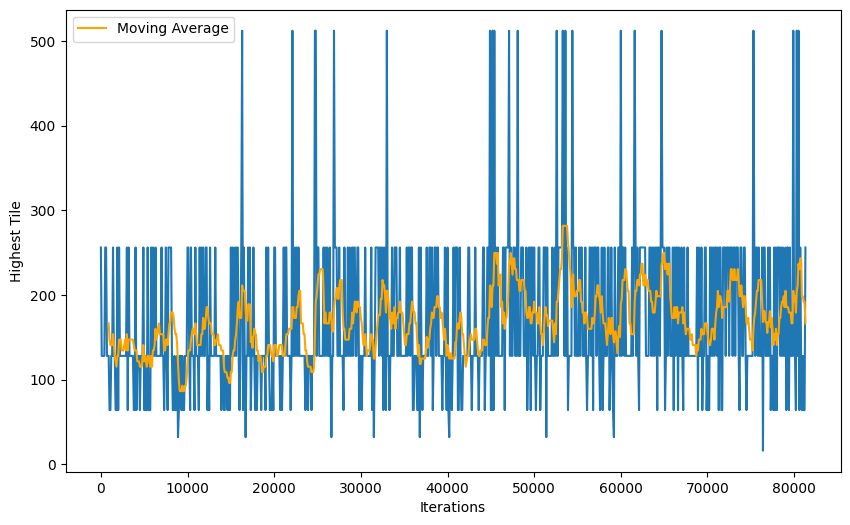

In [262]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Iteration', y='Highest Tile', data=df_q)
plt.xlabel('Iterations')
plt.ylabel('Highest Tile')
df_q = df_q.sort_values(by='Iteration')
df_q['Moving Average'] = df_q['Highest Tile'].rolling(window=10).mean()
sns.lineplot(x='Iteration', y='Moving Average', data=df_q, color='orange', label='Moving Average')
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Iteration', y='Highest Tile', data=df_q)
plt.xlabel('Iterations')
plt.ylabel('Highest Tile')
mean_values = df_q.groupby('Iteration')['Highest Tile'].mean().reset_index()
sns.lineplot(x='Iteration', y='Highest Tile', data=mean_values, color='red', label='Mean')
plt.show()